In [1]:
import sys

import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

sys.path.append("..")

In [2]:
# Data generation

N = 50  # The number of data
D = 2  # The number of data dimensions
noise = 1.0e-1


# The true function
def f_true(X):
    return np.sin(X[:, 0]) + (1 / (1 + np.exp(-X[:, 1])))


X = np.random.uniform(low=-np.pi, high=np.pi, size=(N, D))
y = f_true(X) + noise * np.random.normal(scale=1.0, size=(N,))

In [3]:
# train / test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40, 2), (10, 2), (40,), (10,))

In [4]:
# Rff Regression

from models.rff_regressor import RffRegressor

model_rff = RffRegressor(lmd=1.0e-1, n_rff=100).fit(X_train, y_train)
y_hat = model_rff.predict(X_test)

mean_squared_error(y_test, y_hat)

0.048791174059806375

In [5]:
# Linear Regression

from sklearn.linear_model import LinearRegression

model_lin = LinearRegression()
model_lin.fit(X_train, y_train)
y_hat = model_lin.predict(X_test)

mean_squared_error(y_test, y_hat)

0.2868414493523362

In [6]:
# KernelRidge Regression

from sklearn.kernel_ridge import KernelRidge

model_krn = KernelRidge(kernel="rbf")
model_krn.fit(X_train, y_train)
y_hat = model_krn.predict(X_test)

mean_squared_error(y_test, y_hat)

0.2822802347792075

In [7]:
# Hyper parameters of Rff

import pandas as pd

n_rffs = [8, 16, 32, 64, 128]
lmds = [1.0, 1.0e-1, 1.0e-2, 1.0e-3, 1.0e-4]

results = []

for n_rff in n_rffs:
    for lmd in lmds:

        model_rff = RffRegressor(lmd=lmd, n_rff=n_rff).fit(X_train, y_train)
        y_hat = model_rff.predict(X_test)

        r = dict(n_rff=n_rff, lmd=lmd, mse=mean_squared_error(y_test, y_hat))
        results.append(r)

        print(f"n_rff={r['n_rff']:3d}, lmd={r['lmd']:.4f}: {r['mse']:.3f}")

n_rff=  8, lmd=1.0000: 0.791
n_rff=  8, lmd=0.1000: 0.689
n_rff=  8, lmd=0.0100: 0.495
n_rff=  8, lmd=0.0010: 0.556
n_rff=  8, lmd=0.0001: 0.168
n_rff= 16, lmd=1.0000: 0.191
n_rff= 16, lmd=0.1000: 0.110
n_rff= 16, lmd=0.0100: 0.092
n_rff= 16, lmd=0.0010: 0.031
n_rff= 16, lmd=0.0001: 0.050
n_rff= 32, lmd=1.0000: 0.257
n_rff= 32, lmd=0.1000: 0.157
n_rff= 32, lmd=0.0100: 0.030
n_rff= 32, lmd=0.0010: 0.040
n_rff= 32, lmd=0.0001: 0.035
n_rff= 64, lmd=1.0000: 0.384
n_rff= 64, lmd=0.1000: 0.054
n_rff= 64, lmd=0.0100: 0.022
n_rff= 64, lmd=0.0010: 0.077
n_rff= 64, lmd=0.0001: 0.064
n_rff=128, lmd=1.0000: 0.222
n_rff=128, lmd=0.1000: 0.056
n_rff=128, lmd=0.0100: 0.048
n_rff=128, lmd=0.0010: 0.267
n_rff=128, lmd=0.0001: 2.697


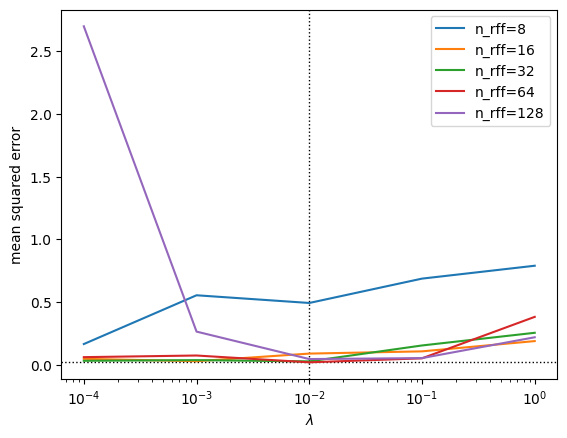

In [8]:
# Visualize results with each hyper parameter

import matplotlib.pyplot as plt

df_results = pd.DataFrame(results)

r_best = df_results.sort_values(by="mse", ascending=True).iloc[0]
plt.axhline(r_best.mse, color="black", linestyle="dotted", lw=1)
plt.axvline(r_best.lmd, color="black", linestyle="dotted", lw=1)

for n_rff in n_rffs:
    r = df_results.query("n_rff == @n_rff")
    plt.plot(r.lmd, r.mse, label=f"n_rff={n_rff}")

plt.xlabel(r'$\lambda$')
plt.ylabel(r'mean squared error')

plt.xscale('log')
plt.legend()